# Week 16 Group Activity

1. Work to improve the model performance for the diabetes decision tree we created in
class. You should be able to improve the precision and recall to be above .8 and .7
respectively. You can improve the preprocessing OR alter the model itself.


In [21]:
# Dependencies and Modules

import pandas as pd
from sklearn import tree
from sklearn.metrics import classification_report, plot_confusion_matrix
import pydotplus

from matplotlib import pyplot as plt

from IPython.display import Image

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_1 = diabetes_df.drop('Outcome', axis=1)
y_1 = diabetes_df['Outcome']



In [23]:
# Use RFE for feature selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = tree.DecisionTreeClassifier(max_depth=10, random_state=42)

rfe = RFE(estimator, n_features_to_select = 3)

selector = rfe.fit(X_1, y_1)

# select columns X2, X6, X7
selector.support_

array([False,  True, False, False, False,  True,  True, False])

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# convert RFE output into columns, create new variables
cols = X_1.columns[selector.support_==True]

X = diabetes_df[cols]
y = diabetes_df['Outcome']

# train model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# scale data
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [25]:
# create and fit classifier
model = tree.DecisionTreeClassifier(max_depth=10, random_state=42, criterion = 'entropy')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
# look at score before tuning
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       151
           1       0.54      0.54      0.54        80

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231



In [27]:
# use grid search for parameter tuning

import numpy as np
from sklearn.model_selection import GridSearchCV

# grid search validation
max_depth_range = np.arange(5,16,1)
param_grid = {'max_depth':max_depth_range, 'criterion':['gini', 'entropy']}
cv = GridSearchCV(tree.DecisionTreeClassifier(),param_grid, cv=6)
cv.fit(X,y)
cv.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [28]:
#create and fit new classifier with CV parameters
model = tree.DecisionTreeClassifier(max_depth=6, random_state=42, criterion = 'entropy')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Bingo!
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       151
           1       0.59      0.66      0.62        80

    accuracy                           0.72       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.72      0.73       231



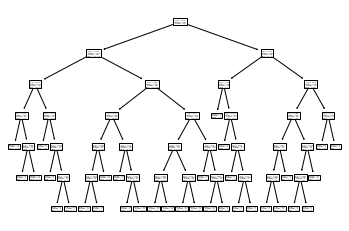

In [29]:
tree.plot_tree(model)
plt.savefig("big_ol'_tree.svg")
plt.show()

2. Create a function that accepts an array of names and returns a string formatted as a list
of names separated by commas EXCEPT for the last two names, which are separated
by an ampersand (and sign - &)

Example input:
[ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ]

Example output:
Nichole, Tanisha & Maggi

In [10]:
def array_to_string(arr):
    
    string = ''
    
    for i in range(len(arr)):
        # if i is equal to the length of the array -1, need to use '&' before the final name
        if i == len(arr) -1:
            string = string + ' & ' + arr[i]['name']
        elif i == len(arr) - 2: #penultimate
            string = string + arr[i]['name']
        else:
            string = string + arr[i]['name'] + ', '
            
    return(string)

array_in = [{'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'}]

array_to_string(array_in)

'Nichole, Tanisha & Maggie'

In [11]:
another_array = [{'name': 'Tom'}, {'name': 'Sarah'}, {'name': 'Phillip'}, {'name': 'Claudius'}, {'name': 'Shep'}]

array_to_string(another_array)

'Tom, Sarah, Phillip, Claudius & Shep'